### 在SVM中使用多项式 处理非线性的数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X,y = datasets.make_moons()

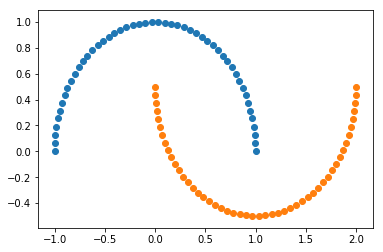

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

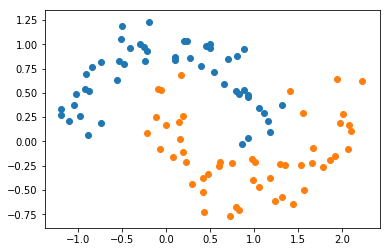

In [5]:
X,y = datasets.make_moons(noise=0.15,random_state=666) # 添加噪音
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [7]:
def PloyPolynomialSvC(degree,c=1.0):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("stand",StandardScaler()),
        ("svc",LinearSVC(C=c))
    ])

In [9]:
poly_svc = PloyPolynomialSvC(degree=3)
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('stand', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [10]:
def plot_deciBiOn_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1),
    )
   
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    print(type(x0.ravel()))
    print(type(x0))
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF590","#90CAF9"])
    plt.contourf(x0,x1,zz,cmap=custom_cmap,linewidth=5)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


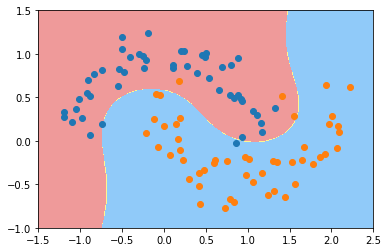

In [12]:
plot_deciBiOn_boundary(poly_svc,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 使用多项式核函数的SVM

In [21]:
from sklearn.svm import SVC
def PolynomialKernelSvC(degree,c=1.0):
    return Pipeline([
        ("stand",StandardScaler()),
        ("kernelsvc",SVC(kernel='poly',degree=degree,C=c)) # 直接进行多项式处理
    ])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


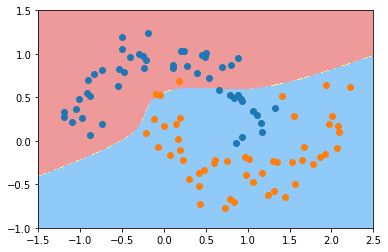

In [24]:
kernelSvm = PolynomialKernelSvC(degree=3)
kernelSvm.fit(X,y)
plot_deciBiOn_boundary(kernelSvm,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show() 